In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Hledur fashion mnist gagnasettid
#hafid path sem toma strenginn ef skrain er i somu moppu og tid erud ad vinna i
def load_f_mnist(path, kind="train"):
    import os
    import gzip

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, "%s-labels-idx1-ubyte.gz" % kind)
    images_path = os.path.join(path, "%s-images-idx3-ubyte.gz" % kind)

    with gzip.open(labels_path, "rb") as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, "rb") as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

    return images, labels

#Hledur mnist gagnasettid
#hafid path sem toma strenginn ef skrain er i somu moppu og tid erud ad vinna i
def load_mnist(path, kind="train"):
    import os
    import gzip

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, "mnist_%s-labels-idx1-ubyte.gz" % kind)
    images_path = os.path.join(path, "mnist_%s-images-idx3-ubyte.gz" % kind)

    with gzip.open(labels_path, "rb") as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, "rb") as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

    return images, labels

In [6]:
X, labels = load_mnist("") #mnist
X_f, labels_f = load_f_mnist("")  #fashion mnsist

print(X, labels)
print(X_f, labels_f)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [5 0 4 ... 5 6 8]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [9 0 0 ... 3 0 5]


In [27]:
def plot_one(X,i):
    one = X[1].reshape(28, 28)
    fig = plt.figure
    plt.imshow(one, cmap="grey")
    plt.show()

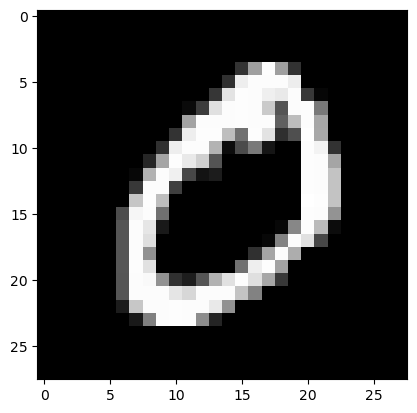

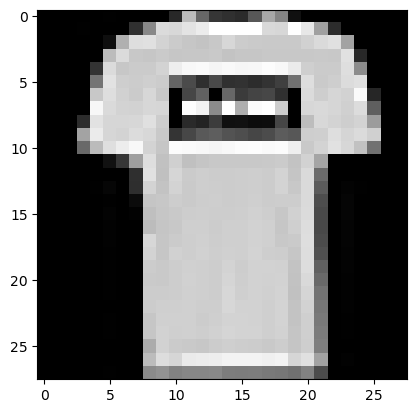

In [28]:
plot_one(X,10)
plot_one(X_f,101)

In [29]:
def run_kmeans(data, k, max_iter=100):
    
    arr = np.array([data])
    
    for i in range(k):
        print(i)
        

    return arr

def assign(data, centroids):
    return data


def update(data,assignments, centroids):
    return data



In [30]:
# her erum vid ad keyra kmeans a fashion mnist gagnasettid
#assignments = run_kmeans(X_f,10)
assignments_orig = run_kmeans(X,10)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [7]:
def plot_result(X,clust, output):
    plt.figure(figsize=(20, 20))
    for i in range(1, 101):
        plt.subplot(10, 10, i)
        plt.imshow(X[np.where(output == clust)][i].reshape(28, 28), cmap=plt.cm.binary)

    plt.show()

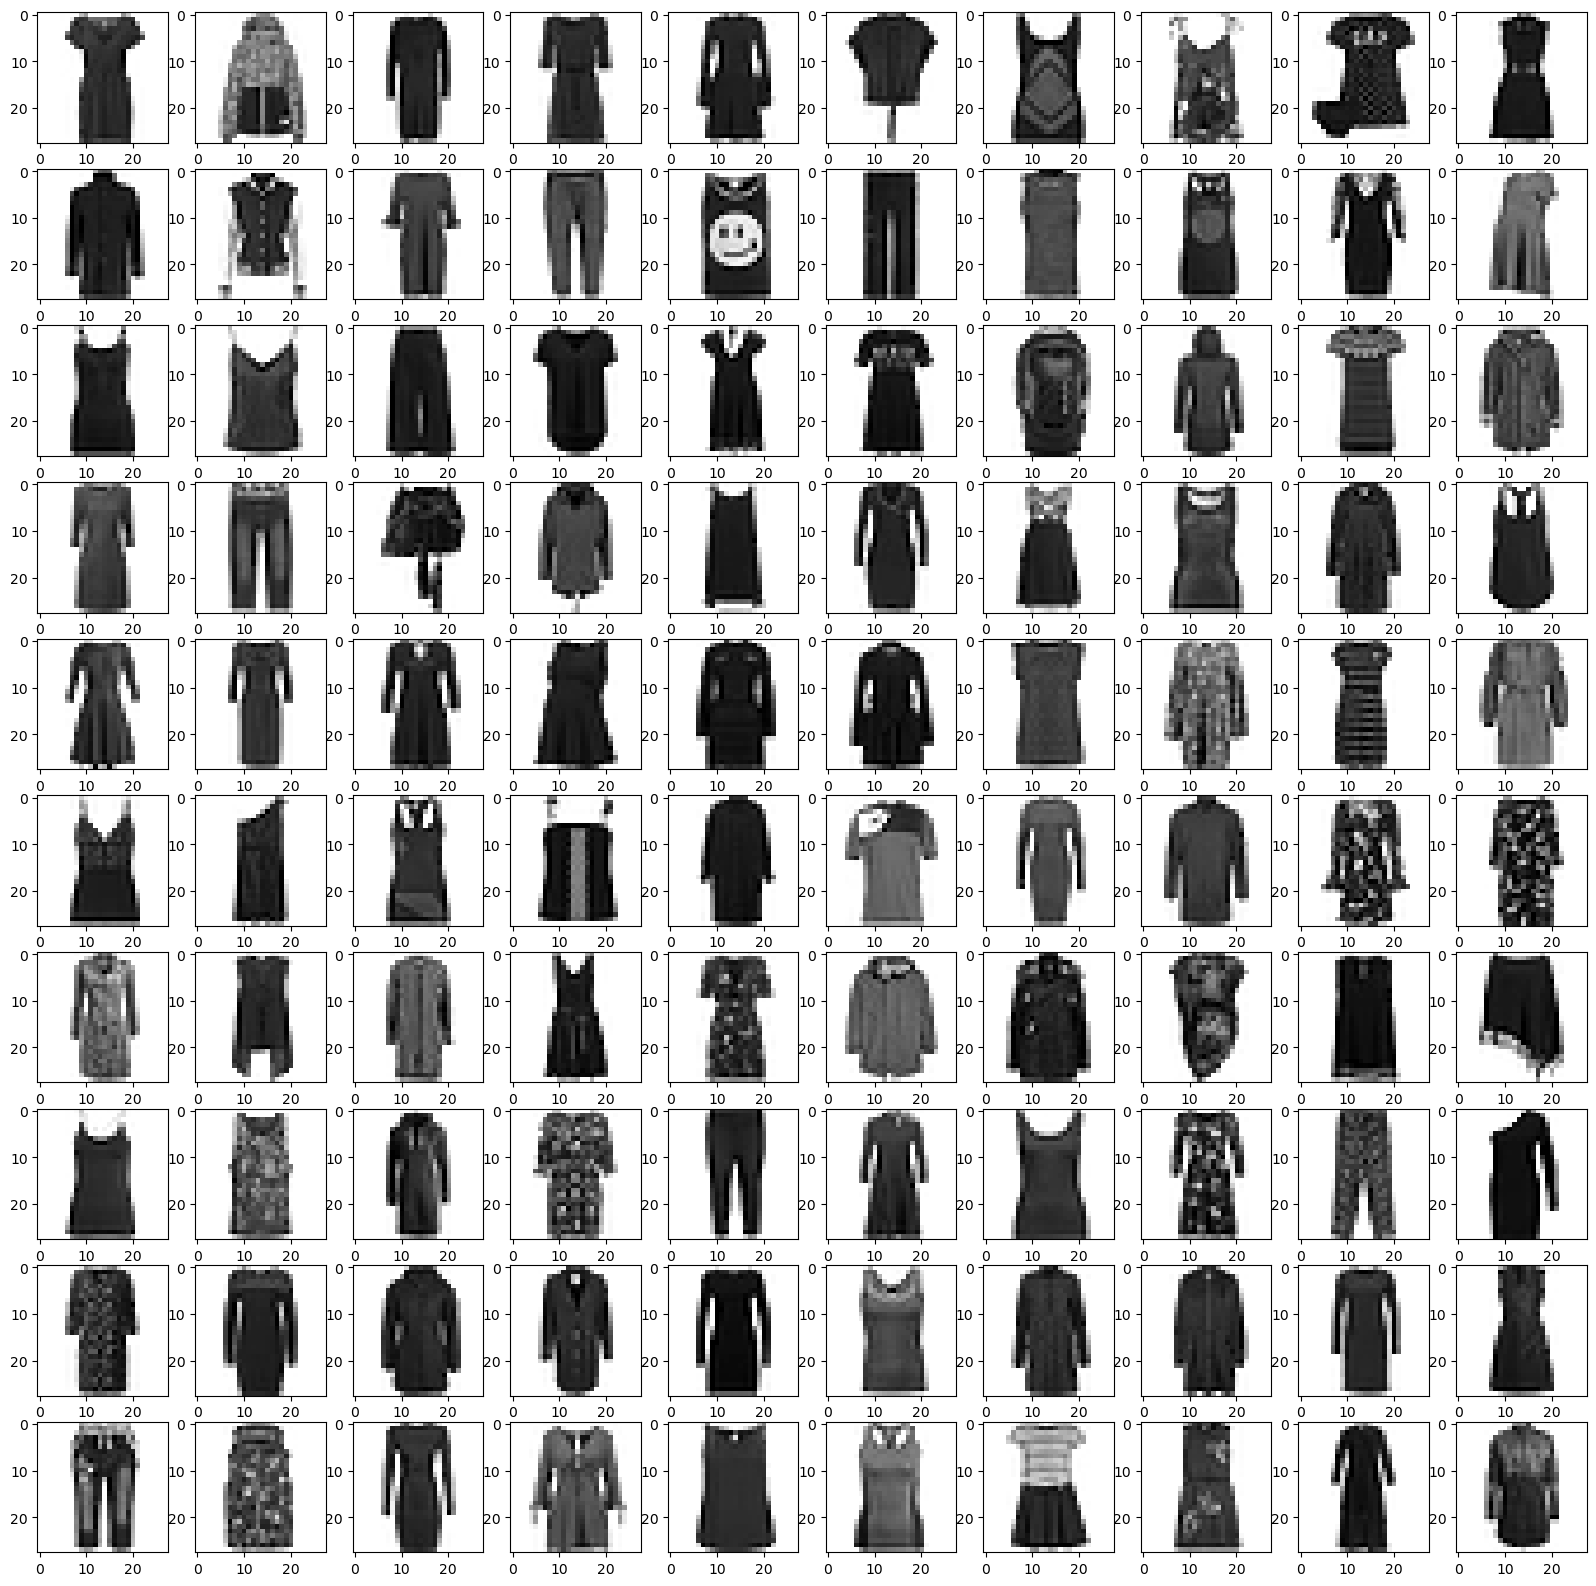

In [11]:
#her eru fyrstu 100 stokin sem vid reikniritið mitt flokkaði i flokk 2.
# sjaum að þetta er líklegast kjóla flokkurinn en eitthvað af bolum og buxum hafa dottið með. Smá óhjákvæmilegt.
plot_result(X_f,2,assignments)

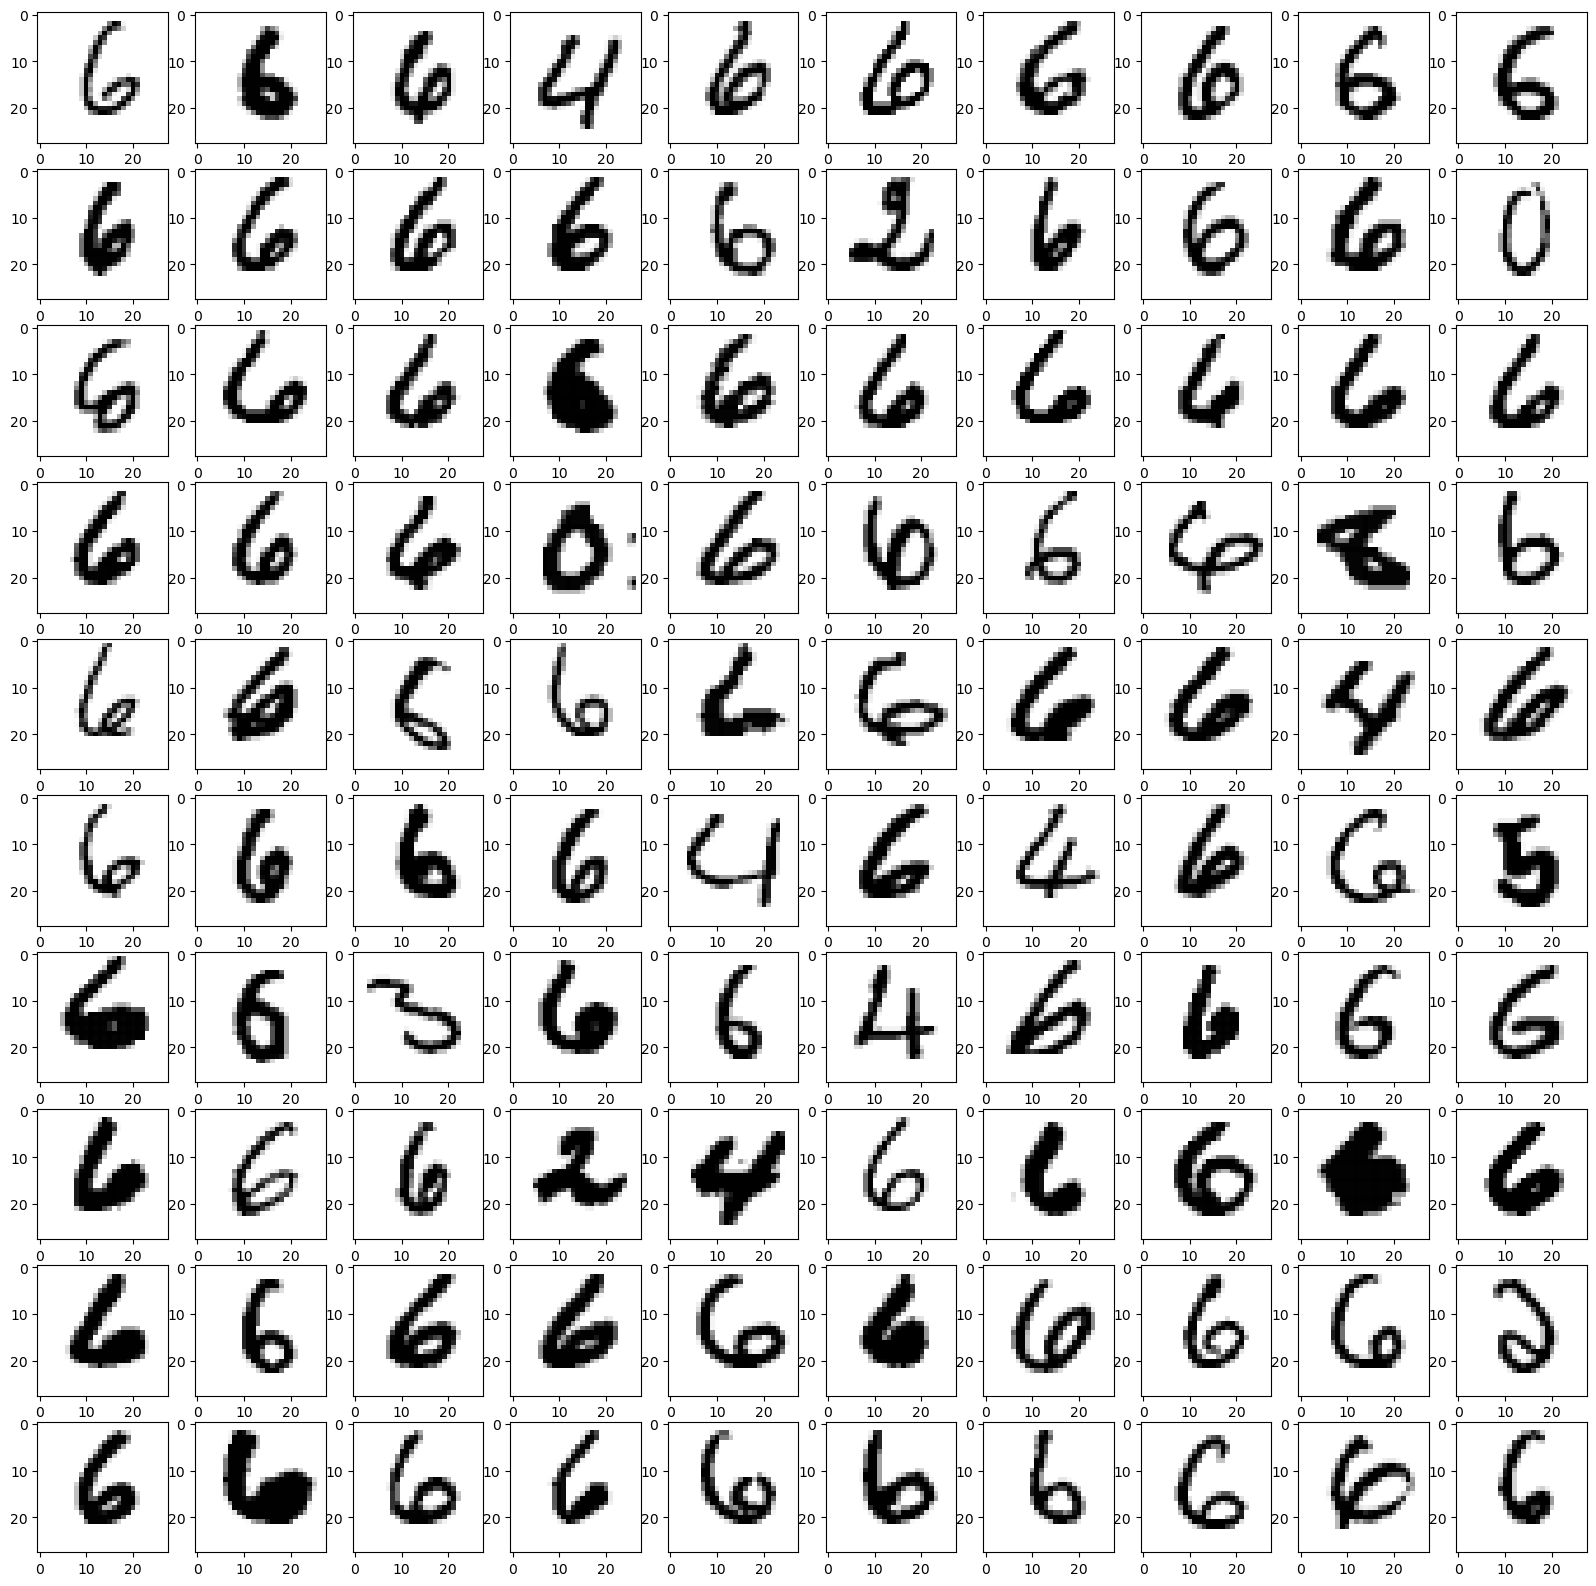

In [14]:
#her eru fyrstu 100 stokin sem vid reikniritið mitt flokkaði i flokk 3 i upprunalega mnist (tölurnar þeas).
# sjaum að þetta er talan 6. Hinsvegar hafa laumast inn einn tvistur og nokkrir fjarkar og slíkt. Samt nokkuð gott. 
plot_result(X,3,assignments_orig)

Flokkar stemma ekki endilega milli labela, sem er rétta svarið og svo assignments hjá okkur. Þeas við gætum sett alla tvista í flokk 2 en í labels(rétta svarinu) er það í flokk 5. Við þurfum því aðeins að umrita. Hvernig getum við synt hversu nákvæmt líkanið okkar er. Úthlutum hverjum flokk í giskinu okkar, assignments hér að ofan

In [16]:
#ef assignments eru lokagiskid okkar og labels eru retta svarid sem vid faum tegar vid tokum inn gognin
#og cat er einhver flokkur 
#tetta fall tetta fall okkur besta gisk a hvada flokkur tetta er i labels.
def get_real_category(assignment,labels,cat):
    a = labels[np.where(assignment==cat)]
    unique, counts = np.unique(a, return_counts=True)
    return dict(zip(unique, counts))

In [20]:
#get_real_category(assignments_orig,labels,1)
d = get_real_category(assignments_orig,labels,1)
print(d)

{0: 23, 1: 53, 2: 165, 3: 337, 4: 28, 5: 572, 6: 10, 7: 50, 8: 3374, 9: 52}


In [27]:
#Sjaum ad ofan ad okkar flokkur 1 er i raunveruleikanum flokkur 8.
#sem tydir ad vid flokkum í flokk 1 með um 72% nákvæmni
d[8]/sum(d.values())

0.7234133790737565

Við flokkum í flokk 1 með um 72% nákvæmni. Sem ef má sjá að neðan stemmir því þetta er "raunverulega" flokkur 8. Það fylgja einhverjir, ásar, fimmur og þristar með.

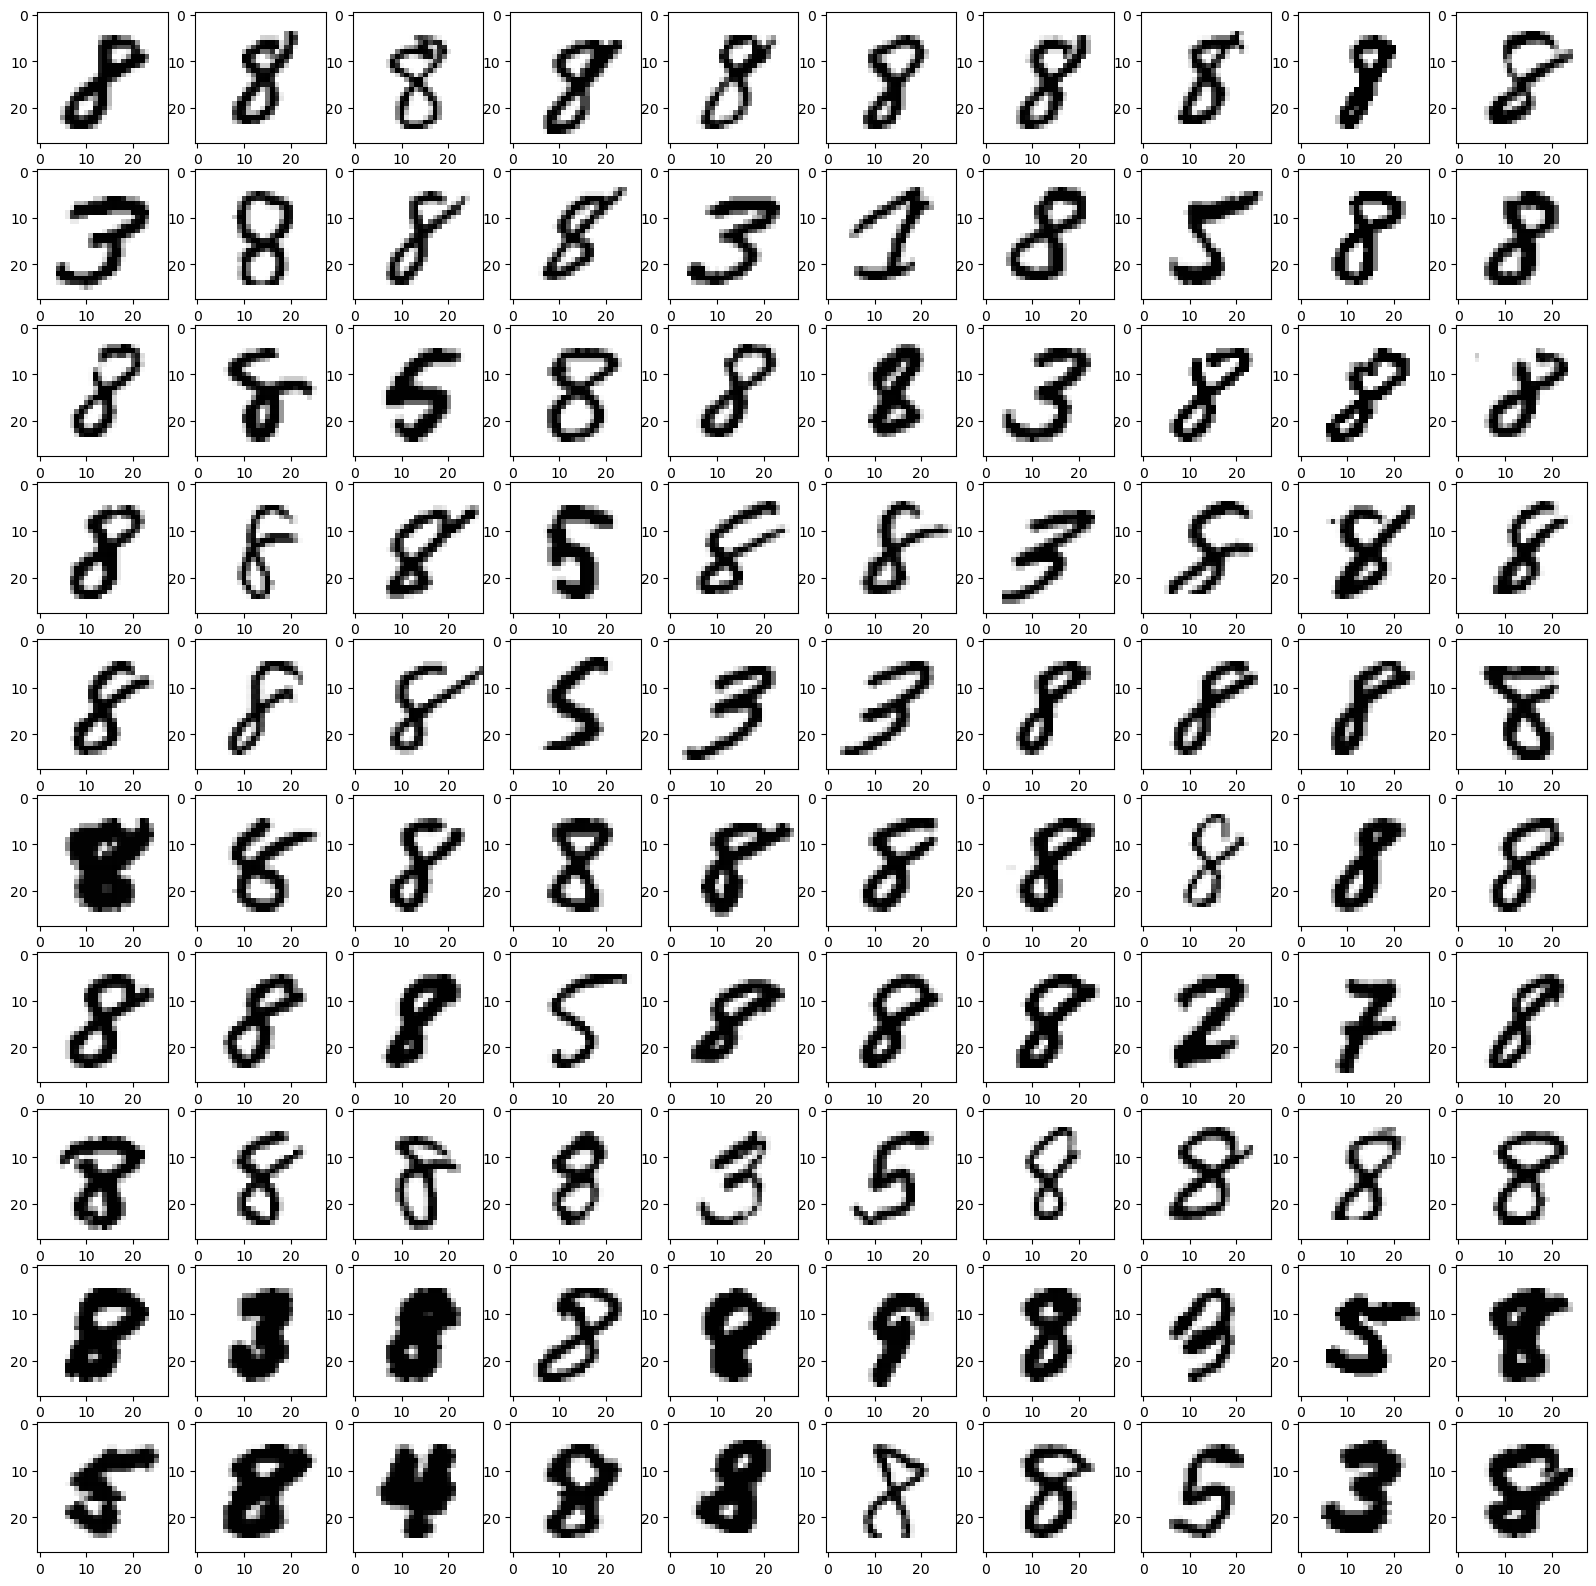

In [28]:
plot_result(X,1,assignments_orig)